# 6.2 - Trans-D partition sampling: Regression with discontinuities  #

<!--<badge>--><a href="https://colab.research.google.com/github/inlab-geo/pyrjmcmc/blob/main/examples/S6.2 - TransD sampling partition modelling-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

*This tutorial is based on material originally developed by Rhys Hawkins.*

In [1]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #
#
# !git clone https://github.com/inlab-geo/pyrjmcmc
# !pip install pybind11
# !apt install swig
# !pip install git+https://github.com/inlab-geo/pyrjmcmc.git
# %cd pyrjmcmc/examples

In this practical we consider a data set of noisy $(x,y)$ values with
discontinuities (See figure below). The task is again to recover
information about the (red) function from the observations, but this
time the data must also be used to constrain the number and position of
discontinuities.

<img src="Figures/rjmcmc_multi/ch0-exampledata.png" alt="RJMCMC figure" width="400"/>
2-D data set. Red curve is the true function, dots are observed data.

This exercise is an expanded version of the previous one only now we
allow for multiple polynomial functions separated into partitions along
the x axis. We do not know where the discontinuities occur, nor how many
there are. Algorithms for constructing solutions using the Partition
modelling approach are in the python software library
<span>*rjmcmc*</span> available from [here](http://www.iearth.edu.au/codes/). Again you can either  follow the
<span>*rjmcmc library tutorial guide*</span> [[available here](files/Figures/tutorial_multi.pdf)]
to get the solutions to each section and run them, or you can attempt to write solutions yourself using the rjmcmc package.

The same Likelihood function and prior is assumed as in the previous problem, only
now we introduce the number of partitions as unknowns and this also has
a flat prior.

First we load some libraries.

In [2]:
# load libraries
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from pyrjmcmc import rjmcmc

Similar to the single partition tutorial we will use a non-trivial synthetic dataset with added noise. The difference this time is that
we will add a series of discontinuities or step functions and a sign
change.

The base function that is used is an exponentially increasing sine
wave over the domain 0 . . . 10, ie:

$$y = {\rm stepsign(x)} \times e^{x/3} \sin \frac{2x}{3} + {\rm step(x)}$$

Where the step and stepsign functions are defined as follows:

$$
  {\rm step}(x)=\begin{cases}
    15, & \text{ $x<2.5$}\\
    -20, & \text{$2.5\le x<5$}\\
    0, & \text{otherwise}.
  \end{cases}
$$

$$
  {\rm stepsign}(x)=\begin{cases}
    -1, & \text{ $x<2.5$}\\
    1, & \text{$2.5\le x<5$}\\
    -1, & \text{otherwise}.
  \end{cases}
$$

The actual dataset unevenly (though with fairly good coverage)
samples this function and adds some Gaussian noise and these values are save to an ASCII text file. A plot of the synthetic data points
with the true function is shown in the figure above.

**Task 1**.  First load the given data set of $(x^{obs}_i, y^{obs}_i)$ values and
    plot the data. You should see a figure similar to the one above.

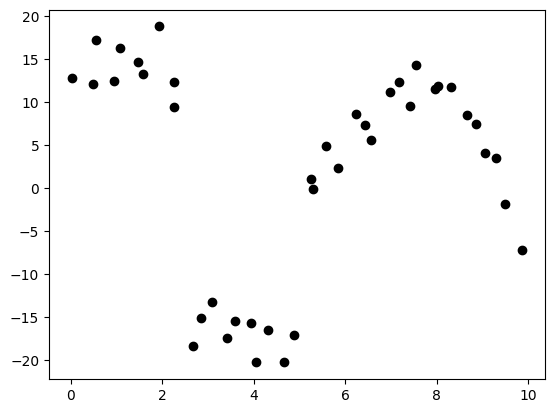

In [3]:
# Open our data file which consists of one (x, y) coordinater per line
# separated by whitespace
#
f = open('datasets/rjmcmc_multi_data.txt', 'r')
lines = f.readlines()

x = []
y = []

for line in lines:
    columns = line.split()

    x.append(float(columns[0]))
    y.append(float(columns[1]))

f.close()

fig = plt.figure()

plt.plot(x, y, 'ko')

plt.show()

**Task 2**. 
In this exercise we assume a polynomial representation for the
    unknown function (red curve) with maximum order 1 and a uniform
    prior PDF, and also sample over the number of partitions and the
    locations of the discontinuities.

Use the 1-D Partition modelling software to generate
    50000 curves and take the mean.  Plot the a) the mean curve, b)
    the posterior PDF of the discontinuity locations and c) the
    posterior PDF of the number of partitions. In this exercise you will need to use routines `data = rjmcmc.dataset1d()` to build the data object, 
    and `results = rjmcmc.regression_part1d(data, pd, burnin, total, max_partitions, max_order)` to carry out the analysis and return the results object.
    
Your figures should be
    similar to the one below.
  
<img src="../Figures/rjmcmc_multi/ch2-analyse.png" alt="RJMCMC figure" width="400"/>
<img src="../Figures/rjmcmc_multi/ch2-analyse-partcount.png" alt="RJMCMC figure" width="400"/>
Figures:

- (Upper panel) 2-D data set with mean reconstructed model from 50000 McMC samples;
- (Middel panel) the posterior PDF of the location of discontinuities in the data (notice the two peaks); 
- (Lower panel) the posterior PDF of the number of partitions detected in the data.

In [4]:
# Write your answer in here

#
# Set range
#
xmin = 0.0
xmax = 10.0

#
# Estimate our error standard deviation
#
sigma = 3.0
n = [sigma] * len(x)

#
# Create the rjmcmc dataset
#
data = rjmcmc.dataset1d(x, y, n)

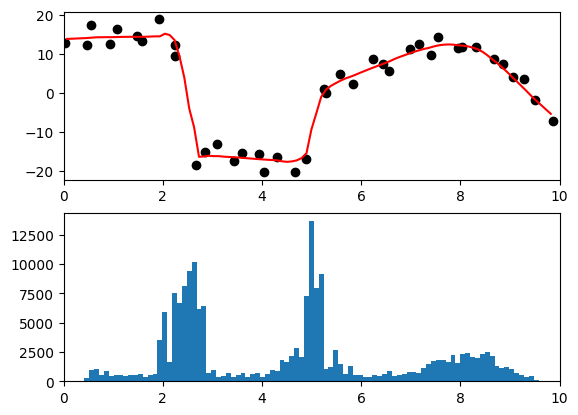

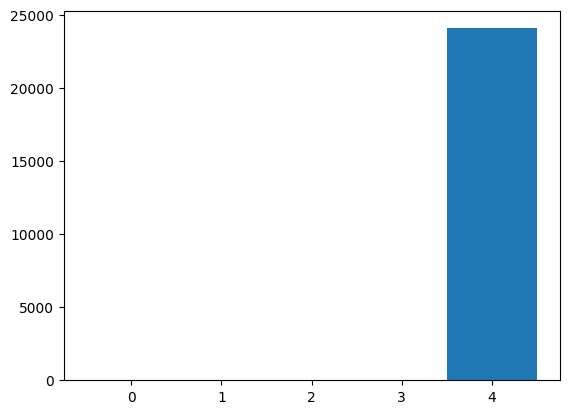

In [5]:
#
# Specify the standard deviation for the move partition 
#
pd = 1.0

#
# Run an analysis with reduced max order to only allow linear 
# segments
#
burnin = 10000
total = 50000
max_partitions = 10
max_order = 1

results = rjmcmc.regression_part1d(data, 
                                   pd, 
                                   burnin, 
                                   total, 
                                   max_partitions,
                                   max_order)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Retrieve the partition location and count information
#
partlocation = results.partition_location_histogram()
partcount = results.partitions()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure(1)

a = plt.subplot(211)

a.plot(x, y, 'ko', xc, meancurve, 'r-')
a.set_xlim(xmin, xmax)

b = plt.subplot(212)
b.bar(xc, partlocation, xc[1] - xc[0])
b.set_xlim(xmin, xmax)

#fig.savefig('ch2-analyse.pdf', format='PDF')

fig = plt.figure(2)

a = plt.subplot(111)
a.hist(partcount, bins=5, range=(0,5), align='left')

#fig.savefig('ch2-analyse-partcount.pdf', format='PDF')

plt.show()

Looking at the results of the Bayesian sampling try and answer the
    following: How many partitions have been detected? Where are the
    most likely location of the partition boundaries/discontinuities?
    Can you see a difference in how well the data is able to detect
    boundaries of each partition? What would you estimate as the likely
    position and error of the discontinuities?


**Task 3**.   In the previous example linear polynomials were used in each
    partition. We now increase the maximum order of the polynomial to 5,
    meaning that up to quintic polynomials are used within each
    partition. For this exercise you will need routine `rjmcmc.regression_part1d(data, pd)` to perform the analysis.
    
Plot the same figures as in the previous exercise showing:
1. the mean curve, 
2. the posterior PDF of the discontinuity locations and 
3. the posterior PDF of the number of partitions. 

See how they have changed at the inference process
now picks out the discontinuity number and location much better.
Your figures should be similar to Figure below. Using these
probabilistic sampling results we might draw different conclusions
than in Q2, but remember here the maximum polynomial order provided
as prior information to the Bayesian procedure is different from in
the previous case.

<img src="Figures/rjmcmc_multi/ch3-order.png" alt="RJMCMC figure" width="400"/>
<img src="Figures/rjmcmc_multi/ch3-orderpartcount.png" alt="RJMCMC figure" width="400"/>

Figures:

- (Top panel) 2-D data set with mean reconstructed model from 50000 McMC samples, with maximum order of polynomial set to 5; 
- (Middle panel) the posterior PDF of the location of discontinuities in the data (notice the two peaks); 
- (Lower panel) the posterior PDF of the number of partitions detected in the data.

In [12]:
# Write your answer in here

#
# Set our x range
#
xmin = 0.0
xmax = 10.0

#
# Estimate our error standard deviation
#
sigma = 3.0
n = [sigma] * len(x)

#
# Create the rjmcmc dataset
#
data = rjmcmc.dataset1d(x, y, n)



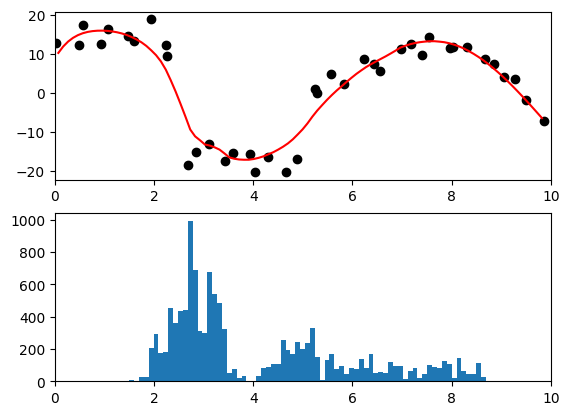

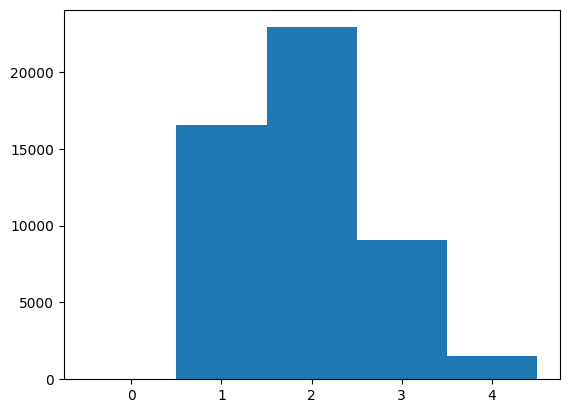

In [13]:
#
# Specify the standard deviation for the move partition 
#
pd = 1.0

#
# Run the default analysis
#
results = rjmcmc.regression_part1d(data, pd)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Retrieve the partition location and count information
#
partlocation = results.partition_location_histogram()
partcount = results.partitions()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure(1)

a = plt.subplot(211)

a.plot(x, y, 'ko', xc, meancurve, 'r-')
a.set_xlim(xmin, xmax)

b = plt.subplot(212)
b.bar(xc, partlocation, xc[1] - xc[0])
b.set_xlim(xmin, xmax)

#fig.savefig('ch3-order.pdf', format='PDF')

fig =plt.figure(2)

a = plt.subplot(111)
a.hist(partcount, bins=5, range=(0,5), align='left')

#fig.savefig('ch3-orderpartcount.pdf', format='PDF')

plt.show()


**Task 4**. Repeat the run, only this time use the library routines to plot a
    density model of the entire ensemble of curves and 95% confidence
    intervals at each point along the axes. In this way we get a visual
    impression of the error in the predicted curve. You should
    get a plot similar to Figure below. This gives an indication of the
    confidence in the predictive capability of the ensemble of curves.
    
For this exercise you will need to use `rjmcmc.regression_part1d_sampled(data, sampler_cb, pd, burnin, total, max_partitions, max_order)`to perform the analysis.

<img src="Figures/rjmcmc_multi/ch4-confidence.png" alt="RJMCMC figure" width="400"/>
<img src="Figures/rjmcmc_multi/ch4-confidenceintervals.png" alt="RJMCMC figure" width="400"/>
Figures:

- (Upper panel) Grayscale image of probability density of all curves in the ensemble when maximum polynomial order equal to 5 inside each partition; 
- (Lower panel) 95% (point by point) confidence intervals from the ensemble of solutions.]

In [14]:
# Write your answer in here

#
# This is an example of the callback function which can be passed to rjmcmc routines to sample the curves generated 
# during the analysis
#
sample_x = None
sample_curves = []
sample_i = 0
sample_rate = 250
def sampler_cb(x, y):
    global sample_x, sample_curves, sample_i, sample_rate

    if sample_i == 0:
        sample_x = x

    if sample_i % sample_rate == 0:
        sample_curves.append(y)

    sample_i = sample_i + 1

    #

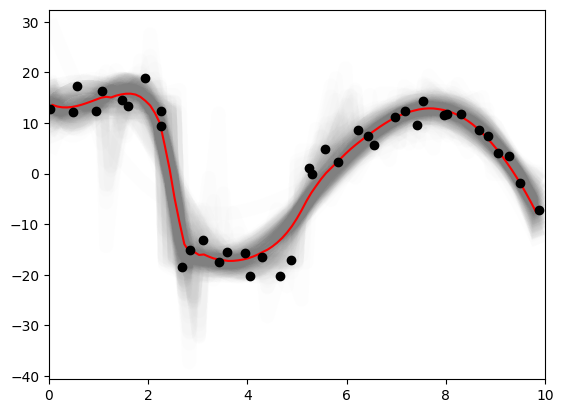

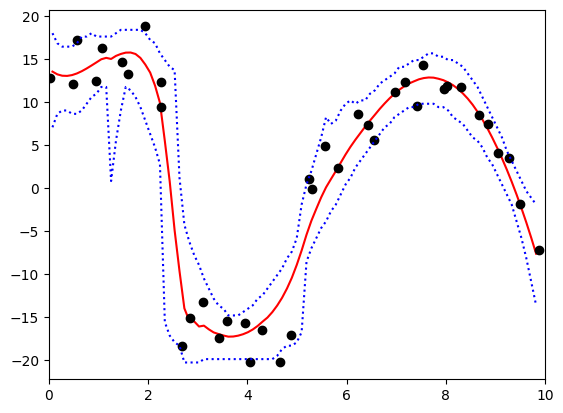

In [15]:
# Run a series of analyses with varying maximum allowed order
#
#
# Specify the standard deviation for the move partition 
#
pd = 1.0

#
# Run an analysis with reduced max order to only allow linear 
# segments
#
burnin = 10000
total = 50000
max_partitions = 10
max_order = 3

results = rjmcmc.regression_part1d_sampled(data, 
                                           sampler_cb,
                                           pd,
                                           burnin, 
                                           total, 
                                           max_partitions,
                                           max_order)

#
# Plot the data with black crosses, the sample curves as faint lines, and
# the mean as a red line
#
fig = plt.figure(1)
ax = fig.add_subplot(111)

yc = 0.5
yalpha = 1.0/((1.0 - yc) * float(len(sample_curves)))
for sy in sample_curves:

    ax.plot(sample_x, sy, 
            color = str(yc),
            alpha = yalpha,
            linestyle = '-',
            linewidth = 10)

ax.plot(results.x(), results.mean(), 'r-')
ax.plot(x, y, 'ko')
ax.set_xlim(xmin, xmax)

#fig.savefig('ch4-confidence.pdf', format='PDF')

fig = plt.figure(2)
ax = fig.add_subplot(111)

ax.plot(results.x(), results.mean(), 'r-')
ax.plot(x, y, 'ko')
ax.plot(results.x(), results.credible_min(), 'b:')
ax.plot(results.x(), results.credible_max(), 'b:')

ax.set_xlim(xmin, xmax)

#fig.savefig('ch4-confidenceintervals.pdf', format='PDF')

plt.show()

**Task 5** 
Use the routines to try and estimate
    the standard deviation of the noise in the data. In fact we invert
    for a parameter $\lambda$ which is the ratio of the estimated noise
    (i.e. $\sigma$ in the Likelihood expression above) to the true noise. 
    
For this exercise you will need to set the range and standard deviation of the $\lambda$ values with the routines `data.set_lambda_range(lambda_min, lambda_max)`, and `data.set_lambda_std(lambda_std)`, where the data object has been obtained from the setup routine `data = rjmcmc.dataset1d(x, y, n)`. Then you will need to perform the analysis with  `results = rjmcmc.regression_part1d(data, pd)`, after which you can obtain various diagnostics using
`results.partition_location_histogram(), results.partitions(), results.proposed(), results.acceptance(), results.lambda_history()`
    
Plot a histogram of
    the results and see how well the Bayesian sampling is able to
    constrain the level of noise in the data. Your results should be
    similiar to Figure below. If the data were estimated with $\sigma=3$,
    what do you think the true value was?

<img src="Figures/rjmcmc_multi/ch5-hierarchical.png" alt="RJMCMC figure" width="400"/>
Figure: Posterior PDF of the data noise parameter λ values found from sampling.

In [16]:
#
# Set a range of where we think the error should be
#
lambda_min = 0.5
lambda_max = 3.0
lambda_std = 0.1

data.set_lambda_range(lambda_min, lambda_max)
data.set_lambda_std(lambda_std)


[1540, 1540, 630, 3133, 7680] [9948, 10110, 10017, 10107, 9818]
Lambda Acceptance Rate: 78.22367080871868
Lambda average: 1.5677445632574671


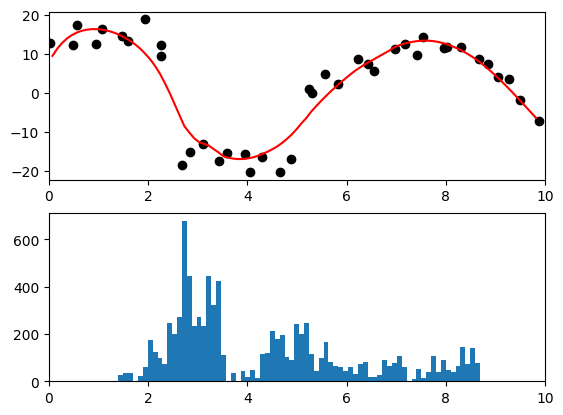

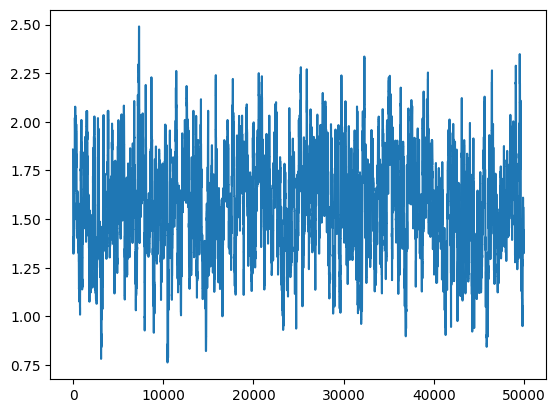

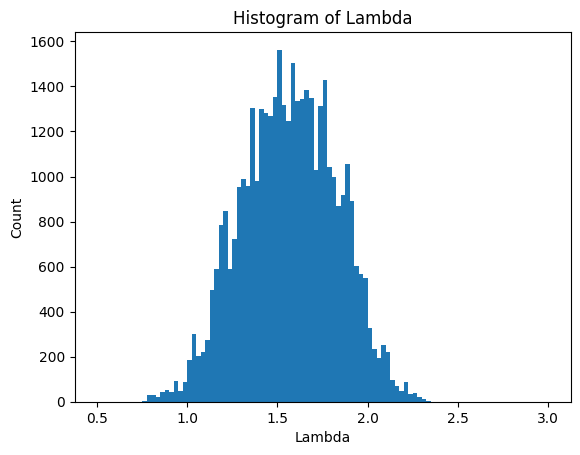

In [17]:
#
# Specify the standard deviation for the move partition 
#
pd = 1.0

#
# Run the default analysis
#
results = rjmcmc.regression_part1d(data, pd)

#
# Retrieve the mean curve for plotting
#
xc = results.x()
meancurve = results.mean()

#
# Retrieve the partition location and count information
#
partlocation = results.partition_location_histogram()
partcount = results.partitions()

#
# Retrieve the results of the hierarchical
#
p = results.proposed()
a = results.acceptance()
print (a, p)

print ('Lambda Acceptance Rate:', float(a[4])/float(p[4]) * 100.0)

lh = results.lambda_history()

#
# Plot the data with black crosses and the mean with a red line
#
fig = plt.figure(1)

a = plt.subplot(211)

a.plot(x, y, 'ko', xc, meancurve, 'r-')
a.set_xlim(xmin, xmax)

b = plt.subplot(212)
b.bar(xc, partlocation, xc[1] - xc[0])
b.set_xlim(xmin, xmax)


fig = plt.figure(2)
plt.plot(range(len(lh)), lh)

fig = plt.figure(3)

a = plt.subplot(111)
lsamples = lh[10000:]

n, bins, patches = a.hist(lsamples, 100, range=(lambda_min, lambda_max))
a.set_title('Histogram of Lambda')
a.set_xlabel('Lambda')
a.set_ylabel('Count')

#fig.savefig('ch5-hierarchical.pdf', format='PDF')
print ('Lambda average:', sum(lsamples)/float(len(lsamples)))

plt.show()


----